# Машинное обучение, ФКН ВШЭ

## Практическое задание 4. Классификация. 

### Общая информация
Дата выдачи: 20.10.2020

Мягкий дедлайн: 01:59MSK 02.11.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 05.11.2020

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-classification-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-classification-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: Я не знаю, простите. Я хочу спать и плакать. Но вроде 11.01

Счастья, здоровья!!!! :) (я знаю, что можно было изменить max_iter, но перезапускать и-за этого все ячейки не стала)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). 

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

"Можете воспользоваться" != нужно использовать. Так что я не буду) Grid Search выглядит поприятнее циклика с кросс-валидацией...

In [12]:
C = np.logspace(-3, 2, 10)
grid = GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': C})
grid.fit(X_train, y_train)
best_c = grid.best_params_['C']
print("Best C = %.5f" % best_c)

Best C = 0.01292


На тестовой части посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами. Сравните результаты. 

In [13]:
model2 = SVC(C = best_c, kernel='linear', probability=True)
model2.fit(X_train, y_train) 
pred_pr_y = model2.predict_proba(X_test)
pred_pr_y = pred_pr_y[:, 1]

In [14]:
auc_roc = roc_auc_score(y_test, pred_pr_y)
print('Значение AUC-ROC №1 = %.5f' % auc_roc)

pr, re, thresholds = roc_curve(y_test, pred_pr_y, pos_label=1)
print('Значение AUC-ROC №2 = %.5f' % auc(pr, re))

auc_pr = average_precision_score(y_test, pred_pr_y) 
print("Значение AUC-PR №1 = %.5f" % auc_pr)

pr, re, thresholds = precision_recall_curve(y_test, pred_pr_y)
print('Значение AUC-PR №2 = %.5f' % auc(re, pr))

Значение AUC-ROC №1 = 0.84789
Значение AUC-ROC №2 = 0.84789
Значение AUC-PR №1 = 0.81562
Значение AUC-PR №2 = 0.81523


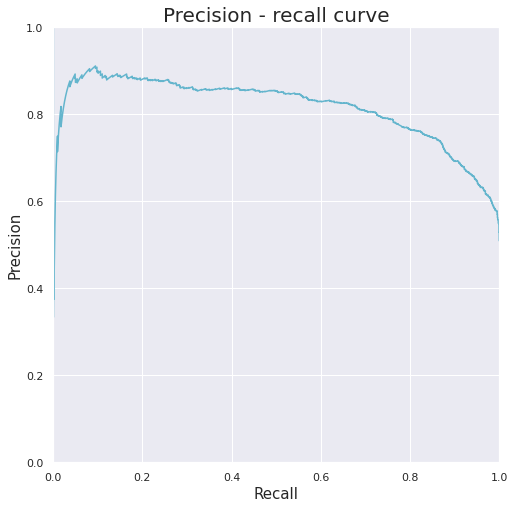

In [15]:
plt.figure(figsize=(8, 8))
plt.plot(re, pr, color='c')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Precision', size=15)
plt.xlabel('Recall', size=15)
plt.title('Precision - recall curve', size=20)
plt.show()

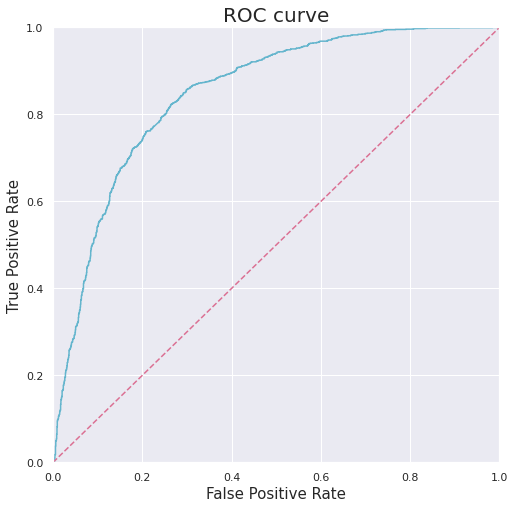

In [16]:
plt.figure(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, pred_pr_y, pos_label=1)
plt.plot(fpr, tpr, color='c')
plt.plot([0, 1], [0, 1], 'r--', color='palevioletred')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC curve', size=20)
plt.show()

Рандомный классификатор:

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X, y)
pred = clf.predict(X_test)
r_pred = clf.predict_proba(X_test)
r_pred = r_pred[:, 1]

In [19]:
auc_roc = roc_auc_score(y_test, r_pred)
print('Значение AUC-ROC №1 = %.5f' % auc_roc)

pr, re, thresholds = roc_curve(y_test, r_pred, pos_label=1)
print('Значение AUC-ROC №2 = %.5f' % auc(pr, re))

auc_pr = average_precision_score(y_test, r_pred) 
print("Значение AUC-PR №1 = %.5f" % auc_pr)

pr, re, thresholds = precision_recall_curve(y_test, r_pred)
print('Значение AUC-PR №2 = %.5f' % auc(re, pr))

Значение AUC-ROC №1 = 0.96815
Значение AUC-ROC №2 = 0.96815
Значение AUC-PR №1 = 0.96562
Значение AUC-PR №2 = 0.96559


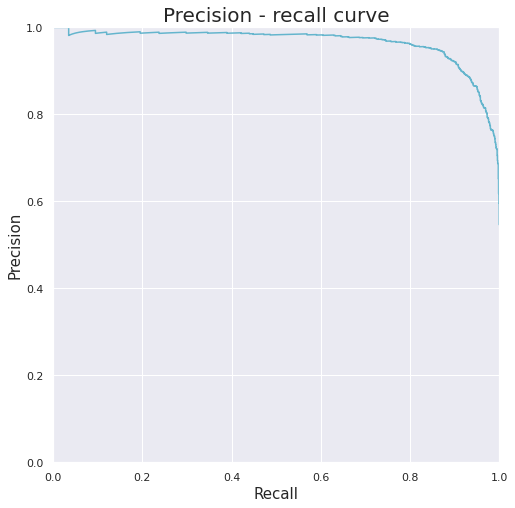

In [20]:
pr, re, thresholds = precision_recall_curve(y_test, r_pred)
plt.figure(figsize=(8, 8))
plt.plot(re, pr, color='c')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Precision', size=15)
plt.xlabel('Recall', size=15)
plt.title('Precision - recall curve', size=20)
plt.show()

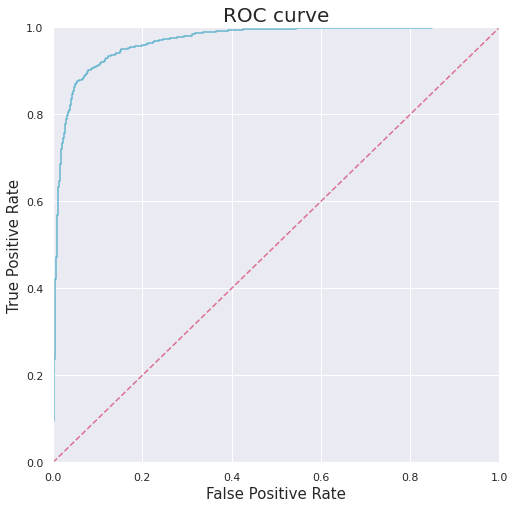

In [21]:
plt.figure(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, r_pred, pos_label=1)
plt.plot(fpr, tpr, color='c')
plt.plot([0, 1], [0, 1], 'r--', color='palevioletred')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC curve', size=20)
plt.show()

Ну что сказать, ну что сказать... Рандомный классификатор нас обыграл.

А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых. Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
C = np.logspace(-5, 5, 100)
grid = GridSearchCV(estimator=LogisticRegression(penalty='l2', random_state=42),
             param_grid={'C': C})
grid.fit(X_train, y_train)
best_c_2  = grid.best_params_['C']
print("Best C = %.5f" % best_c_2)

Best C = 0.01072


Что-то оно подозрительно быстро считается... После SVM - очень подозрительно...

In [24]:
model_2 = LogisticRegression(penalty='l2', C = best_c_2, random_state=42)
model_2.fit(X_train, y_train) 
pred_pr_y_2 = model_2.predict_proba(X_test)
pred_pr_y_2 = pred_pr_y_2[:, 1]

In [25]:
auc_roc = roc_auc_score(y_test, pred_pr_y_2)
print('Значение AUC-ROC №1 = %.5f' % auc_roc)

pr, re, thresholds = roc_curve(y_test, pred_pr_y_2, pos_label=1)
print('Значение AUC-ROC №2 = %.5f' % auc(pr, re))

auc_pr = average_precision_score(y_test, pred_pr_y_2) 
print("Значение AUC-PR №1 = %.5f" % auc_pr)

pr, re, thresholds = precision_recall_curve(y_test, pred_pr_y_2)
print('Значение AUC-PR №2 = %.5f' % auc(re, pr))

Значение AUC-ROC №1 = 0.84760
Значение AUC-ROC №2 = 0.84760
Значение AUC-PR №1 = 0.82988
Значение AUC-PR №2 = 0.82962


У LR вышли немного более хорошие результаты (AUC-PR на 0.01 больше). Но в целом всее идентично. Оба метода хуже рандомного классификатора.

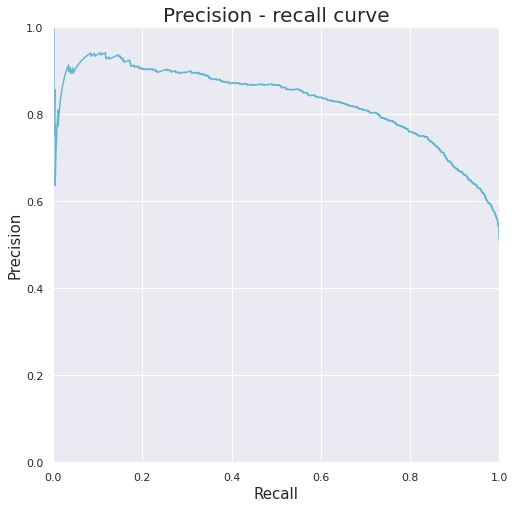

In [26]:
plt.figure(figsize=(8, 8))
plt.plot(re, pr, color='c')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Precision', size=15)
plt.xlabel('Recall', size=15)
plt.title('Precision - recall curve', size=20)
plt.show()

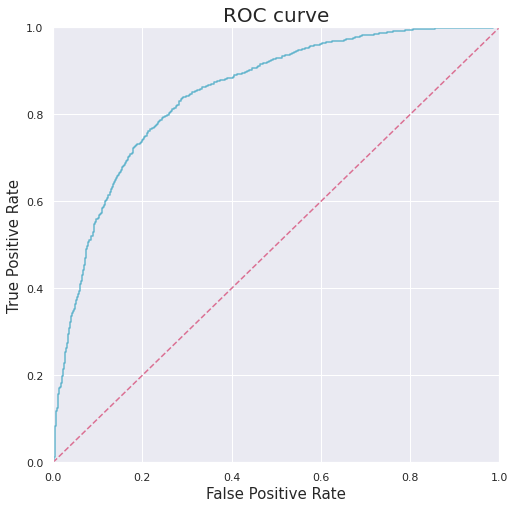

In [27]:
plt.figure(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, pred_pr_y_2, pos_label=1)
plt.plot(fpr, tpr, color='c')
plt.plot([0, 1], [0, 1], 'r--', color='palevioletred')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC curve', size=20)
plt.show()

Я, конечно, не эксперт, но вышло почти одинаково...

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

In [28]:
f, s = make_classification(
    n_samples=10000, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

f_train, f_test, s_train, s_test = train_test_split(
    f, s, test_size=0.3, random_state=42)

In [29]:
model = SVC(kernel='linear')
model.fit(f_train, s_train) 
pred_s = model.predict(f_test)

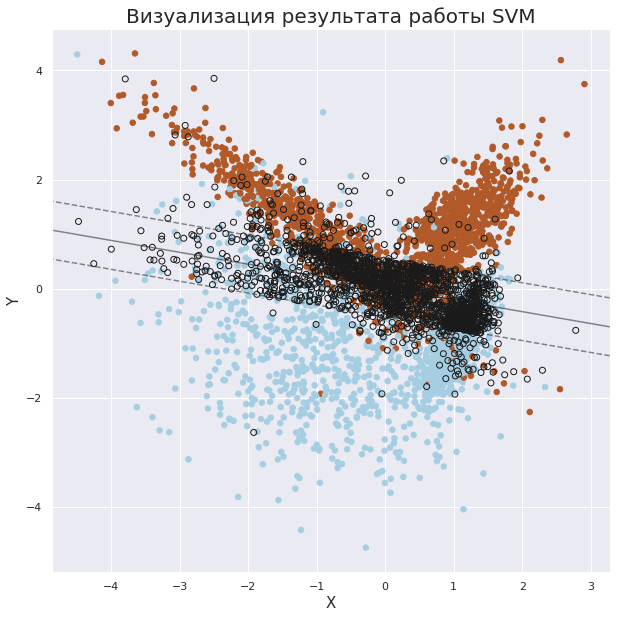

In [30]:
d1 = {0:'lightsteelblue', 1:'palevioletred'}
plt.figure(figsize=(10, 10))

plt.scatter(f_test[:, 0], f_test[:, 1], c=s_test, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('X', size=15)
plt.ylabel('Y', size=15)
plt.title('Визуализация результата работы SVM', size=20)
plt.show()

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов правдоподобие положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

Я нашла способ красивее, чем plt.pcolor

In [31]:
model_2 = LogisticRegression(penalty='l2', random_state=42)
model_2.fit(f_train, s_train) 
pred_s2 = model_2.predict(f_test)

Кланяюсь в ноги https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

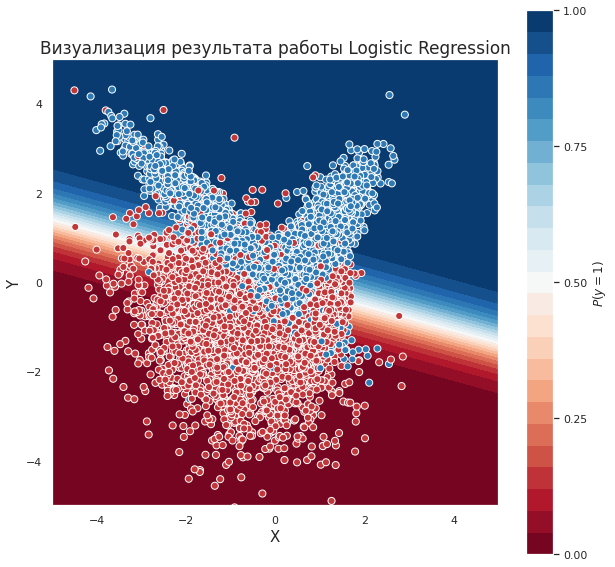

In [32]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_2.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 10))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = fig.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(f[100:,0], f[100:, 1], c=s[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white")

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5))
ax.set_xlabel('X', size=15)
ax.set_ylabel('Y', size=15)
ax.set_title('Визуализация результата работы Logistic Regression', size=17)

plt.show()

А это норм, что я на 1 балл потратила часов 5...

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [33]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins *  i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append(l + (r - l) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) 
    plt.figure(figsize=(8,8))
    plt.plot(bin_middle_points, bin_real_ratios, linewidth=2)
    plt.ylim([-0.05, 1.05])
    plt.grid()

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

In [34]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [35]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train) 
pred_y = model.predict_proba(X_test)
pred_y = pred_y[:, 1]

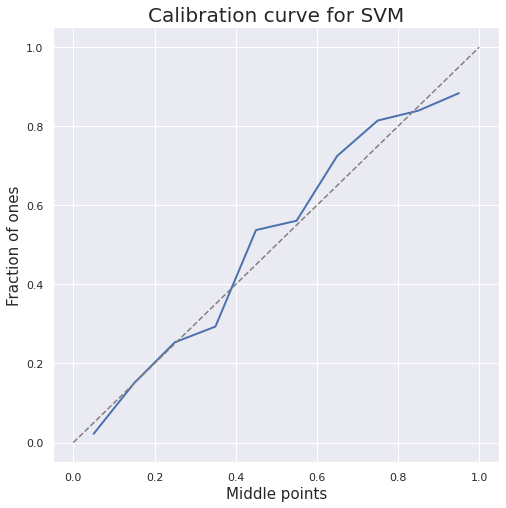

In [36]:
plot_calibration_curve(y_test, pred_y)
plt.plot([0, 1], [0, 1], 'r--', color='grey')
plt.ylabel('Fraction of ones', size=15)
plt.xlabel('Middle points', size=15)
plt.title('Calibration curve for SVM', size=20)
plt.grid()
plt.show()

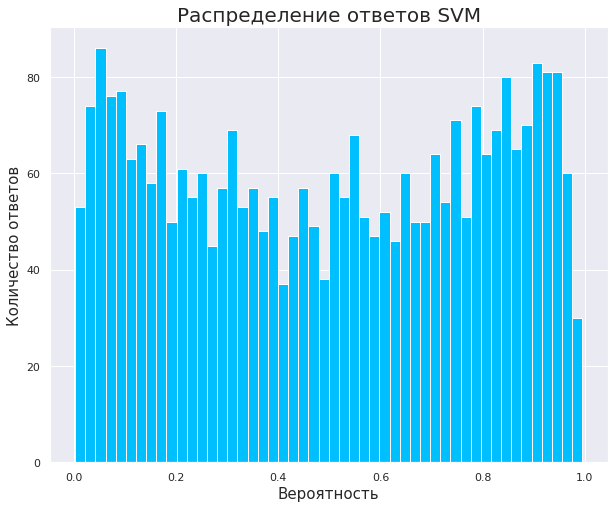

In [37]:
plt.figure(figsize=(10, 8))
plt.hist(pred_y, bins=50, color='deepskyblue')
plt.xlabel('Вероятность', size=15)
plt.ylabel('Количество ответов', size=15)
plt.title('Распределение ответов SVM', size=20)
plt.show()

In [38]:
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train) 
pred_y = model.predict_proba(X_test)
pred_y = pred_y[:, 1]

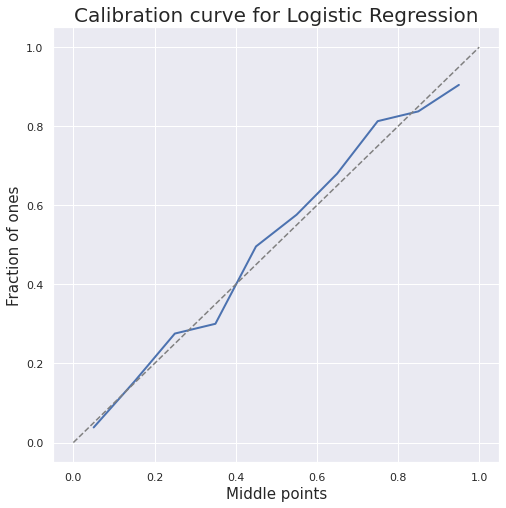

In [39]:
plot_calibration_curve(y_test, pred_y)
plt.plot([0, 1], [0, 1], 'r--', color='grey')
plt.ylabel('Fraction of ones', size=15)
plt.xlabel('Middle points', size=15)
plt.title('Calibration curve for Logistic Regression', size=20)
plt.grid()
plt.show()

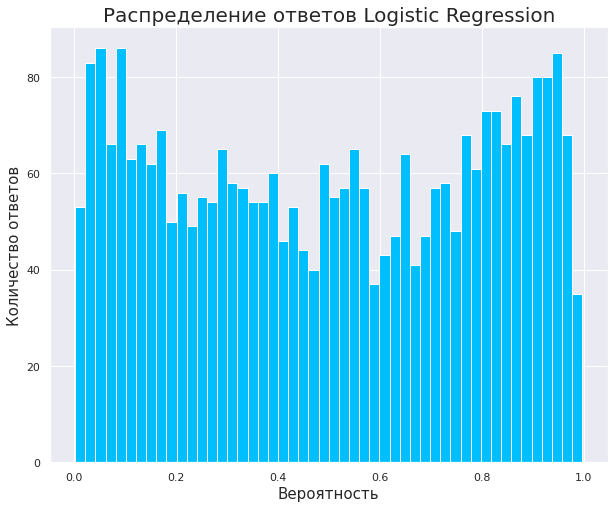

In [40]:
plt.figure(figsize=(10, 8))
plt.hist(pred_y, bins=50, color='deepskyblue')
plt.xlabel('Вероятность', size=15)
plt.ylabel('Количество ответов', size=15)
plt.title('Распределение ответов Logistic Regression', size=20)
plt.show()

Чисто внешне кажется, что разбределение для LR больше сдвинуто вправо. То есть в среднем больше положительных ответов. Но и калибровочная кривая для LR ближе к диагонали. Значит LR оценивает вероятнотси немного более точно.

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [41]:
from sklearn.calibration import CalibratedClassifierCV

In [42]:
model = SVC(kernel='linear', probability=True) 
calibrator = CalibratedClassifierCV(model)
calibrator.fit(X_train, y_train) 
pred_y = calibrator.predict_proba(X_test)
pred_y = pred_y[:, 1]

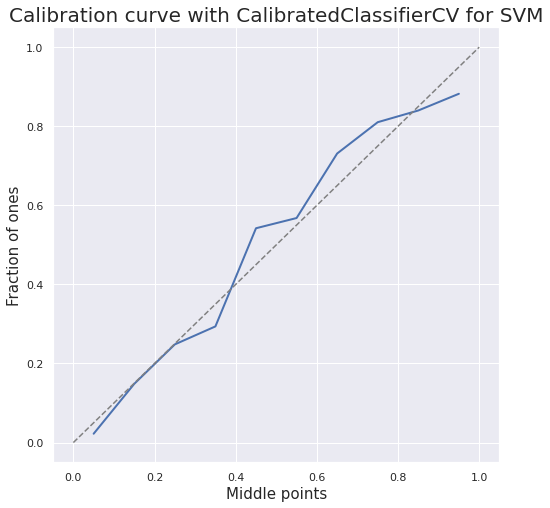

In [43]:
plot_calibration_curve(y_test, pred_y)
plt.plot([0, 1], [0, 1], 'r--', color='grey')
plt.ylabel('Fraction of ones', size=15)
plt.xlabel('Middle points', size=15)
plt.title('Calibration curve with CalibratedClassifierCV for SVM', size=20)
plt.grid()
plt.show()

Не знаю, лично я изменений (кроме того, что оно считалось 300 лет) не заметила.

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты. Ключевые слова для вдохновения: `Platt`, `Isotonic`.

In [353]:
print('¯\_(ツ)_/¯' * 15)

¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯¯\_(ツ)_/¯


# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [388]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

--2020-11-02 19:02:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.4’

bank-additional.zip 100%[===================>] 434.15K   573KB/s    in 0.8s    

2020-11-02 19:02:08 (573 KB/s) - ‘bank-additional.zip.4’ saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/.DS_Store  
replace __MACOSX/bank-additional/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/bank-additional/._.DS_Store  
replace bank-additional/.Rhistory? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/.Rhistory  
replace bank-additional/bank-additional

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи — какой? Отбросьте его. 



In [48]:
from sklearn.model_selection import train_test_split

Либо это ловушка, либо жёсткая подсказка, но в файлике с описанием признаков было написано, что стоит удалить duration.

 Ну, стоит, так стоит.

In [389]:
df = df.drop(columns='duration')

In [390]:
X = df.drop(columns=['y'])
y = (df.y == 'yes')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, stratify=y)

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__: Пишу ответ на этот вопрос уже в конце дз, так что да. Как мы могли заметить, у нас значение AUC-PR было где-то 0,4.
И вот с AUC-ROC есть такая проблема, что там со значениями около 1/2 не очень приятно работать. Так как если AUC-ROC < 1/2, то чем он меньше, тем лучше, а если > 1/2, то чем больше, они лучше. С AUC-PR таких треблов нет. Все четко и ясно - чем больше, тем лучше.

Про кодирование числовых призаков ничего не говорилось, так что сделаю вид, что числовых признаков не существует.

(Очень стараюсь не ругаться на того, кто составял дз, очень стараюсь...)

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
import time

In [391]:
categorical = ['job', 'marital', 'education', 'default', 
               'housing', 'contact', 'loan', 'month',
               'day_of_week', 'poutcome']

In [392]:
column_transformer = ColumnTransformer([
    ('or', OrdinalEncoder(), categorical)],
    remainder='passthrough')

pipeline = Pipeline(steps=[
    ('or', column_transformer),
    ('regression', LogisticRegression(penalty='l2', random_state=777))
])

start_time = time.time()
model = pipeline.fit(X_train, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 0.6246721744537354 секунд


In [393]:
y_2_pred = model.predict_proba(X_test)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Значение AUC-PR = 0.41219


__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [55]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)],
     remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', LogisticRegression(penalty='l2', random_state=42))
])

start_time = time.time()
model = pipeline.fit(X_train, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 0.9131765365600586 секунд


In [98]:
y_2_pred = model.predict_proba(X_test)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Значение AUC-PR = 0.43500


Так, ну как может заметить, качество с OneHot возрасло где-то на 0.02, что (спойлер) неплохо. Но при этом и на время работы тоже возрасло почти в 1.5 раза.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?


__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


**5.**

In [396]:
def base_counter(X, y, categorical):    
        X_copy = X.copy()
        X_copy['y'] = y

        for cat in categorical:
            h = X_copy.groupby(by=[cat]).mean()[['y']]
            X_copy = X_copy.merge(h, on=cat, how='left')
            X_copy = X_copy.drop([cat], axis=1)
            X_copy.rename(columns={'y_y' : cat, 'y_x' : 'y'}, inplace=True)
        
        X_copy = X_copy.drop(['y'], axis=1)

        return X_copy

In [397]:
start_time = time.time()

new_X = base_counter(X_train, y_train, categorical)
t_new_X = base_counter(X_test, y_test, categorical)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(t_new_X)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 0.9691531658172607 секунд
Значение AUC-PR = 0.41751




Заметила ли я что-нибудь интересное? Нет. Качетво по сравнению с OHE упало, по сравнению с Ordinal немного вырасло.

**Бонус:**

In [398]:
from sklearn.base import BaseEstimator, TransformerMixin
import copy

In [399]:
class BaseCounter(BaseEstimator, TransformerMixin):
    def __init__(self, categorical):
        self.X_copy = pd.DataFrame()
        self.categorical = categorical

    def fit(self, X, y): #тут надо посчитать все, что зависит от таргета
        self.X_copy = X.copy()
        self.X_copy['y'] = y
        return self

    def transform(self, X):
        result = self.X_copy.copy()
        for cat in self.categorical:
            h = result.groupby(by=[cat]).mean()[['y']]
            result = result.merge(h, on=cat, how='left')
            result = result.drop([cat], axis=1)
            result.rename(columns={'y_y' : cat, 'y_x' : 'y'}, inplace=True)
        
        result = result.drop(['y'], axis=1)

        return result

In [400]:
start_time = time.time()

c_1 = BaseCounter(categorical)
c_2 = BaseCounter(categorical)
c_1.fit(X_train, y_train)
c_2.fit(X_test, y_test)

new_X = c_1.transform(X_train)
t_new_X = c_2.transform(X_test)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(t_new_X)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 1.0224549770355225 секунд
Значение AUC-PR = 0.41751


Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.5 балла)__

In [401]:
class NoiseCounter(BaseEstimator, TransformerMixin):
    def __init__(self, categorical):
        self.X_copy = pd.DataFrame()
        self.categorical = categorical

    def fit(self, X, y): #тут надо посчитать все, что зависит от таргета
        self.X_copy = X.copy()
        self.X_copy['y'] = y
        return self

    def transform(self, X):
        result = self.X_copy.copy()
        for cat in self.categorical:
            h = result.groupby(by=[cat]).mean()[['y']]
            noise = np.random.normal(1, 1, len(h))
            noise = np.reshape(noise, (noise.shape[0], 1))
            h += noise
            result = result.merge(h, on=cat, how='left')
            result = result.drop([cat], axis=1)
            result.rename(columns={'y_y' : cat, 'y_x' : 'y'}, inplace=True)
        
        result = result.drop(['y'], axis=1)

        return result

In [402]:
start_time = time.time()

c_1 = NoiseCounter(categorical)
c_2 = NoiseCounter(categorical)
c_1.fit(X_train, y_train)
c_2.fit(X_test, y_test)

new_X = c_1.transform(X_train)
t_new_X = c_2.transform(X_test)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(t_new_X)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 0.9578030109405518 секунд
Значение AUC-PR = 0.42028


__(Бонусная часть, 0.5 балла)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 



:с

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

In [405]:
class MeanCounter(BaseEstimator, TransformerMixin):  #будем считать, что мы подразумеваем также и присутствие шума
    def __init__(self, categorical):
        self.X_copy = pd.DataFrame()
        self.categorical = categorical
        self.g_mean = 0

    def fit(self, X, y): #тут надо посчитать все, что зависит от таргета
        self.X_copy = X.copy()
        self.X_copy['y'] = y
        self.g_mean = np.sum(y) / len(y)
        return self

    def transform(self, X):
        result = self.X_copy.copy()
        for cat in self.categorical:
            h = result.groupby(by=[cat]).mean()[['y']]
            noise = np.random.normal(1, 1, len(h))
            noise = np.reshape(noise, (noise.shape[0], 1))
            h += noise + 10 * self.g_mean
            result = result.merge(h, on=cat, how='left')
            result = result.drop([cat], axis=1)
            result.rename(columns={'y_y' : cat, 'y_x' : 'y'}, inplace=True)
        
        result = result.drop(['y'], axis=1)

        return result

In [406]:
start_time = time.time()

c_1 = MeanCounter(categorical)
c_2 = MeanCounter(categorical)
c_1.fit(X_train, y_train)
c_2.fit(X_test, y_test)

new_X = c_1.transform(X_train)
t_new_X = c_2.transform(X_test)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(t_new_X)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 0.9615473747253418 секунд
Значение AUC-PR = 0.42814


__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



Ну для начало посмотрим на количество уникальных значений возраста.

In [162]:
print("Количество уникальных значений признака возраст =", df['age'].unique().shape[0])

Количество уникальных значений признака возраст = 78


In [407]:
categorical.append('age')

In [408]:
start_time = time.time()

c_1 = MeanCounter(categorical)
c_2 = MeanCounter(categorical)
c_1.fit(X_train, y_train)
c_2.fit(X_test, y_test)

new_X = c_1.transform(X_train)
t_new_X = c_2.transform(X_test)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X, y_train)

print('Время, потребовавшееся на обучение модели с учетом кодирования признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(t_new_X)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Время, потребовавшееся на обучение модели с учетом кодирования признаков = 0.9821906089782715 секунд
Значение AUC-PR = 0.43707


Ну насчет лучше ли стало сложно сказать. Тут с раномом раз на раз не приходится. Но вроде стало, да

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [409]:
s_m = df['month'].unique()
s_m

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [410]:
s_d = df['day_of_week'].unique()
s_d

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

Ага... Несите костыли!!!

In [411]:
n_m = [4, 5, 6, 7, 9, 10, 11, 2, 3, 8]
n_d = np.arange(5)

In [412]:
for i in range(len(s_m)):
    new_X.loc[df['month'] == s_m[i], 'month'] = n_m[i]
    t_new_X.loc[df['month'] == s_m[i], 'month'] = n_m[i]

for i in range(len(s_d)):
    new_X.loc[df['day_of_week'] == s_d[i], 'day_of_week'] = n_d[i]
    t_new_X.loc[df['day_of_week'] == s_d[i], 'day_of_week'] = n_d[i]

In [413]:
model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X, y_train)

y_2_pred = model.predict_proba(t_new_X)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Значение AUC-PR = 0.42702


А вот на этот раз стало хуже(

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием вы заметили.

__Ответ:__ Так, ну кажется главый плюс - это расход памяти. Если категориальных признаков изначально было много, то после OHE их будет просто огромное количество, что, конечно, не есть хорошо. Счетчики же количество признав не увеличивают. Минусом явялется то, что обучаясь на признаках, закодированных счетчиками мы допускаем "утечку" целевой переменной в признаки. Так как счетчик считается по таргету. Таким образом, конечно, это может привести к переобучению. Также в нашем случае ни один из счетчиков не привел к результату лучше, чем OneHotEncoder. А еще из-за рандома они не очень стабильно работают...

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [421]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [423]:
categorical = ['job', 'marital', 'education', 'default', 
               'housing', 'contact', 'loan', 'month',
               'day_of_week', 'poutcome']

In [424]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)],
    remainder='passthrough')

In [177]:
numeric = X_train.shape[1] - len(categorical)
print("Количество категориальных признаков до OneHot:", len(categorical))
print("Количество категориальных признаков после OneHot:", column_transformer.fit_transform(X_train).shape[1] - numeric) 
print("Общее количество признаков до и после OneHot:", X_train.shape[1], '-', column_transformer.transform(X_train).shape[1]) 

Количество категориальных признаков до OneHot: 10
Количество категориальных признаков после OneHot: 53
Общее количество признаков до и после OneHot: 19 - 62


In [275]:
r = np.arange(62)

new_X_train = pd.DataFrame(
    column_transformer.transform(X_train), 
    index=X_train.index,
    columns=r
)

new_X_test = pd.DataFrame(
    column_transformer.transform(X_test), 
    index=X_test.index,
    columns=r
)

tr_X = new_X_train.copy()
te_X = new_X_test.copy()

tr_1X = new_X_train.copy()
te_1X = new_X_test.copy()

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [179]:
model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X_train, y_train)

y_2_pred = model.predict_proba(new_X_test)
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Значение AUC-PR = 0.42957


### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?



In [181]:
from sklearn.linear_model import LinearRegression

In [278]:
start_time = time.time()

model = LinearRegression()
model.fit(new_X_train, y_train)
y_pred = model.predict(new_X_test)

best_40 = abs(model.coef_).argsort()[-40:][::-1]
print('Признаки с лучшими коэффициентами:', best_40)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X_train[best_40], y_train)
print('Время, потребовавшееся на обучение модели с отбором признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(new_X_test[best_40])
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Признаки с лучшими коэффициентами: [58 40 57 39 41 42 36 52 37 60 50 35 43 30 31  8  5 20 46 26 15 24 56  1
 10 51 49 38  3 11 16  4 21  7 47 13 18 12 19 59]
Время, потребовавшееся на обучение модели с отбором признаков = 0.7265992164611816 секунд
Значение AUC-PR = 0.44126


Как можно заметить, качество возрасло (да, всего на 0,02, но в рамках этой задачи - это супер, я считаю).

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

Тысяча извинений за эти полотна кода. Я очень устала((( Возможно, я успею привести это в нормальный вид. Но если вы это читаете, то, видимо, не успела...

In [279]:
numeric = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

n_scaler = ColumnTransformer([
    ('scaling', StandardScaler(), numeric),
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
])

r = np.arange(62)

snew_X_train = pd.DataFrame(
    n_scaler.fit_transform(X_train), 
    index=new_X_train.index,
    columns=r
)

snew_X_test = pd.DataFrame(
    n_scaler.transform(X_test), 
    index=new_X_test.index,
    columns=r
)

model = LinearRegression()
model.fit(snew_X_train, y_train)
y_pred = model.predict(snew_X_test)

best_40 = abs(model.coef_).argsort()[-40:][::-1]
print('Признаки с лучшими коэффициентами:', best_40)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(snew_X_train[best_40], y_train)
y_2_pred = model.predict_proba(snew_X_test[best_40])
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Признаки с лучшими коэффициентами: [22 21 23 24 59 60 61 33 34 35 10 19 12 20 13 16 11  9 18 15 14 17 43 41
 42 37 40 39 38 36 29 31 26 32 28 27 30 25 49 45]
Значение AUC-PR = 0.37520


Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

In [280]:
scaler = ColumnTransformer([
    ('scaling', StandardScaler(), te_1X.columns)
])

r = np.arange(62)

snew_X_train = pd.DataFrame(
    scaler.fit_transform(tr_1X), 
    index=tr_1X.index,
    columns=r
)

snew_X_test = pd.DataFrame(
    scaler.transform(te_1X), 
    index=te_1X.index,
    columns=r
)

model = LinearRegression()
model.fit(snew_X_train, y_train)
y_pred = model.predict(snew_X_test)

best_40 = abs(model.coef_).argsort()[-40:][::-1]
print('Признаки с лучшими коэффициентами:', best_40)

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(snew_X_train[best_40], y_train)
y_2_pred = model.predict_proba(snew_X_test[best_40])
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Признаки с лучшими коэффициентами: [30 31 22 19 13 14 18 21 16 41 12 38 17 36 39 23 42 24 25 35 29 27 43 44
 40 37 15 47 46 49 48 45  0  1  9 20  7 32 34  4]
Значение AUC-PR = 0.32136


Как мы можем заметить, список удаленных признаков получился разным и качество сильно упало (хотя казалось бы, куда еще ниже). Честно, у меня нет предположений, почему так вышло. Но кажется, что скейлерить категориальные признаки было плохой идеей.

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 10 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



In [426]:
new_X_tr = pd.DataFrame(
    column_transformer.fit_transform(X_train), 
    index=X_train.index,
    columns=r
)

new_X_t = pd.DataFrame(
    column_transformer.transform(X_test), 
    index=X_test.index,
    columns=r
)

new_X_tr['y'] = y_train

In [427]:
start_time = time.time()
t = []
for i in range(new_X_tr.shape[1] - 1):
    cur_p = new_X_tr.loc[new_X_tr['y'] == 1, i]
    cur_m = new_X_tr.loc[new_X_tr['y'] == 0, i]
    mu_p = np.mean(cur_p)
    mu_m = np.mean(cur_m)
    n_p = len(cur_p)
    n_m = len(cur_m)
    s_p = np.std(cur_p)
    s_m = np.std(cur_m)
    t.append(np.abs(mu_p - mu_m) / np.sqrt((n_p * np.square(s_p) + n_m * np.square(s_m)) / (n_p + n_m)))

best_40_t = np.array(t).argsort()[-40:][::-1]

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X_tr[best_40_t], y_train)
print('Время, потребовавшееся на обучение модели с отбором признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(new_X_t[best_40_t])
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

Время, потребовавшееся на обучение модели с отбором признаков = 0.8672654628753662 секунд
Значение AUC-PR = 0.43092


Качетсво по сравнению с методом отбора по коэффициентом линейной регрессии оказалось ниже.

### Методы-обёртки

__Задание 11 (1 балл).__ 

Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите обучающую выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только для финальной оценки качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [363]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=777)

r = np.arange(62)

train_1 = pd.DataFrame(
    column_transformer.fit_transform(X_train_1), 
    index=X_train_1.index,
    columns=r
)

train_2= pd.DataFrame(
    column_transformer.transform(X_train_2), 
    index=X_train_2.index,
    columns=r
)

test = pd.DataFrame(
    column_transformer.transform(X_test), 
    index=X_test.index,
    columns=r
)

In [381]:
quant = 62
features = new_X_train.columns
best = list(features.copy())
start_time = time.time()
while quant != 40:
    aucs = []
    for el in best:
        cur = features.copy()
        cur = list(cur)
        cur.remove(el)
        model = LogisticRegression(penalty='l2', random_state=777)
        model.fit(train_1[cur], y_train_1)
        y_2_pred = model.predict_proba(train_2[cur])
        y_2_pred = y_2_pred[:, 1]
        pr, re, thresholds = precision_recall_curve(y_train_2, y_2_pred)
        cur_auc = auc(re, pr)
        aucs.append(cur_auc)
    print()
    print(np.array(aucs).argsort()[0:1][::-1], best[int(np.array(aucs).argsort()[0:1][::-1])])
    best.remove(best[int(np.array(aucs).argsort()[0:1][::-1])])    
    quant -= 1    

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X_train[best], y_train)
print('Время, потребовавшееся на обучение модели с отбором признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(new_X_test[best])
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))


[55] 55

[57] 58

[50] 50

[58] 61

[30] 30

[43] 44

[55] 60

[40] 41

[25] 25

[50] 56

[45] 49

[5] 5

[49] 59

[28] 31

[47] 57

[23] 24

[41] 48

[33] 38

[38] 46

[34] 40

[32] 37

[39] 53
Время, потребовавшееся на обучение модели с отбором признаков = 435.79763555526733 секунд
Значение AUC-PR = 0.35913


И ЭТОГО Я БЛИН ЖДАЛА КУЧУ ВРЕМЕНИ?????????????????????????????

\*выкидываю ноут и иду есть\*

Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук.

In [386]:
quant = 0
features = new_X_train.columns
best = []
cur = list(features.copy())
start_time = time.time()
while quant != 40:
    aucs = []
    for el in cur:
        b = best.copy()
        b.append(el)
        model = LogisticRegression(penalty='l2', random_state=777)
        model.fit(train_1[b], y_train_1)
        y_2_pred = model.predict_proba(train_2[b])
        y_2_pred = y_2_pred[:, 1]
        pr, re, thresholds = precision_recall_curve(y_train_2, y_2_pred)
        cur_auc = auc(re, pr)
        aucs.append(cur_auc)
    print(np.array(aucs).argsort()[-1:][::-1], cur[int(np.array(aucs).argsort()[-1:][::-1])])
    best.append(cur[int(np.array(aucs).argsort()[-1:][::-1])])  
    cur.remove(cur[int(np.array(aucs).argsort()[-1:][::-1])])
    quant += 1    

model = LogisticRegression(penalty='l2', random_state=777)
model.fit(new_X_train[best], y_train)
print('Время, потребовавшееся на обучение модели с отбором признаков =', time.time() - start_time, 'секунд')

y_2_pred = model.predict_proba(new_X_test[best])
y_2_pred = y_2_pred[:, 1]
pr, re, thresholds = precision_recall_curve(y_test, y_2_pred)
print('Значение AUC-PR = %.5f' % auc(re, pr))

[26] 26
[15] 15
[11] 11
[3] 3
[2] 2
[13] 17
[4] 6
[4] 7
[2] 4
[33] 42
[9] 16
[50] 61
[41] 52
[30] 40
[20] 30
[15] 24
[19] 31
[29] 44
[27] 41
[42] 60
[29] 46
[36] 55
[32] 50
[37] 58
[37] 59
[34] 54
[31] 49
[9] 18
[22] 36
[18] 32
[2] 5
[2] 8
[4] 12
[12] 27
[16] 35
[13] 29
[11] 25
[14] 37
[10] 23
[7] 20
Время, потребовавшееся на обучение модели с отбором признаков = 277.881356716156 секунд
Значение AUC-PR = 0.44370


Качество возрасло даже по сравнению с методом отбора по коэффициентам регрессии. Но знаете, оно того не стоило.

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**  К наилучшими качеству привел самый последний метод - добавление по одному самому полезному признаку (с наилучшим качеством прогноза) в выборку до тех пор, пока не наберется 40 штук. Также близко к нему был метод подбора лучших признаков по коэффициентам линейной регрессии. Кажется, что в целом отбор признаков очень важен, ведь может быть так, что признаки, которые изначально кажутся полнезными, негативно влияют на качество прогноза. 

Пройдемся по преимуществам и недостаткам методов. Ну тут сразу хочется сказать о недостатках методов-оберток - это время. ООООООООЧЕНЬ долго все считалось на на нашем наборе данных, который не является большим, да и признаков не так много. Встроенные же методы и методы-фильтрации работают куда быстрее. Хотя иногда и уступают в качестве.

Также хочется сказать, что иногда методы, которые казалось бы, что должны улучшать качество наоборот его ухудшали. Что конечно еще раз подтверждает гипотезу о том, что для каждого набора данных и каждой модели все очень индивидуально.

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 12 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [291]:
from sklearn.model_selection import KFold

In [290]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

In [292]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('ss', StandardScaler(), numeric)],
     remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ct', column_transformer),
    ('regression', LogisticRegression(random_state=500))
])

cv = KFold(n_splits=5, shuffle=True, random_state=500)

rev = []
profit = []
q_calls = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    q_call = list(y_pred).count(1)
    q_calls.append(q_call)
    com_rev = y_test & y_pred
    rev.append(10 * np.sum(com_rev))
    profit.append(10 * np.sum(com_rev) - q_call)

print('Среднее значение выручки =', np.mean(rev))
print('Стандартное отклонение выручки =', np.std(rev))
print('Количество денег, которые нужно будет заплатить операторам колл-центра =', np.mean(q_calls))
print('Среднее значение прибыли =', np.mean(profit))

Среднее значение выручки = 2128.0
Стандартное отклонение выручки = 102.64501936285072
Количество денег, которые нужно будет заплатить операторам колл-центра = 323.6
Среднее значение прибыли = 1804.4


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

В условии нигде не указано, должно ли количество долларов, получаемых от согласного на условия клиента быть целым или нет. Так что я буду считать, что оно целое.

In [ ]:
rev = []
profit = []
q_calls = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    q_call = list(y_pred).count(1)
    q_calls.append(q_call)
    com_rev = y_test & y_pred
    com_rev = list(map(int, com_rev))
    cost = np.random.randint(0, 20, len(com_rev))
    com_rev *= cost
    rev.append(np.sum(com_rev))
    profit.append(np.sum(com_rev) - q_call)

print('Среднее значение выручки =', np.mean(rev))
print('Стандартное отклонение выручки =', np.std(rev))
print('Количество денег, которые нужно будет заплатить операторам колл-центра =', np.mean(q_calls))
print('Среднее значение прибыли =', np.mean(profit))

Среднее значение выручки = 2063.0
Стандартное отклонение выручки = 143.24105556718018
Количество денег, которые нужно будет заплатить операторам колл-центра = 323.6
Среднее значение прибыли = 1739.4


Так, ну отклонение выручки немного увеличилось (что ожидаемо из-за рандома), а средняя выручка уменьшилась.

Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [307]:
r = np.arange(62)

new_X = pd.DataFrame(
    column_transformer.transform(X), 
    index=X.index,
    columns=r
)

In [ ]:
reg = np.logspace(-4, 2, 15)
cv = KFold(n_splits=3, shuffle=True, random_state=500)

best_reg = 1
best_pr = 0
reg_pr = []
reg_d = []
for r in reg:
    model = LogisticRegression(penalty='l2', C=r)
    rev = []
    profit = []
    q_calls = []
    for train_index, test_index in cv.split(new_X):
        X_train, X_test = new_X.iloc[train_index, :], new_X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        q_call = list(y_pred).count(1)
        q_calls.append(q_call)
        com_rev = y_test & y_pred
        com_rev = list(map(int, com_rev))
        cost = np.random.randint(0, 20, len(com_rev))
        com_rev *= cost
        rev.append(np.sum(com_rev))
        profit.append(np.sum(com_rev) - q_call)
    
    reg_pr.append(np.mean(profit))
    reg_d.append(np.std(rev))

    if (np.mean(profit) > best_pr):
        best_reg = r
        best_pr = np.mean(profit)


print('При коэффициенте регуляризациии =', best_reg, 'прибыль максимальна и равна', best_pr)

При коэффициенте регуляризациии = 0.1 прибыль максимальна и равна 2785.6666666666665


Вау! Прибыль выросла на 1000$! Круто-круто.

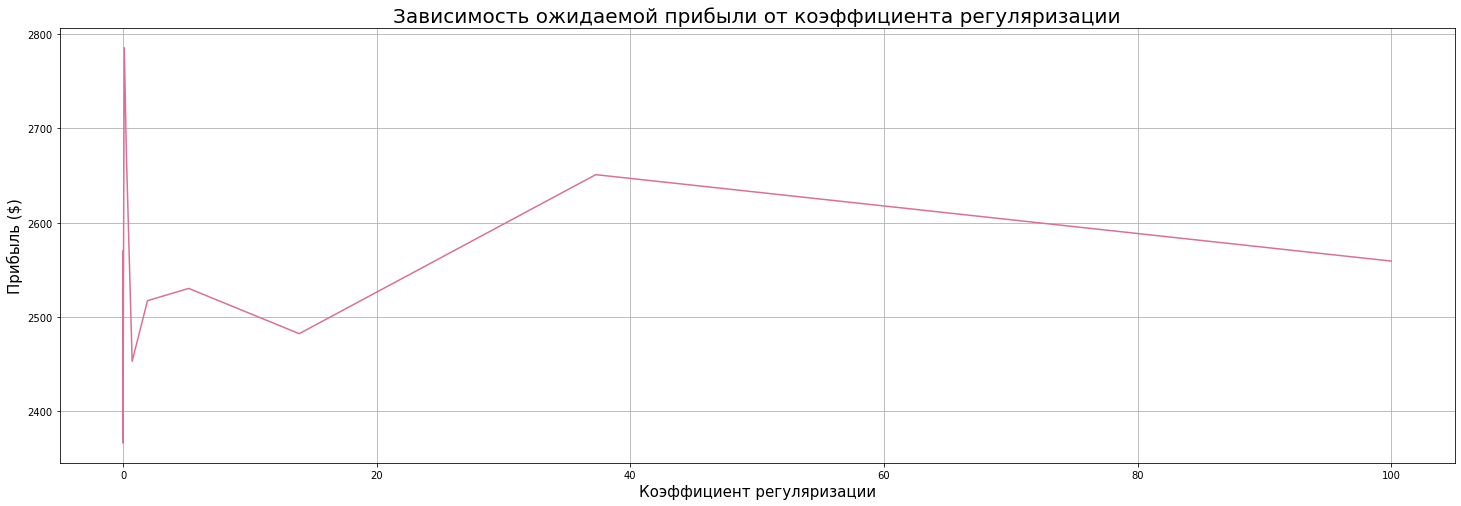

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(reg, reg_pr, c='palevioletred')
plt.ylabel('Прибыль ($)', size=15)
plt.xlabel('Коэффициент регуляризации', size=15)
plt.title('Зависимость ожидаемой прибыли от коэффициента регуляризации', size=20)
plt.grid()
plt.show()

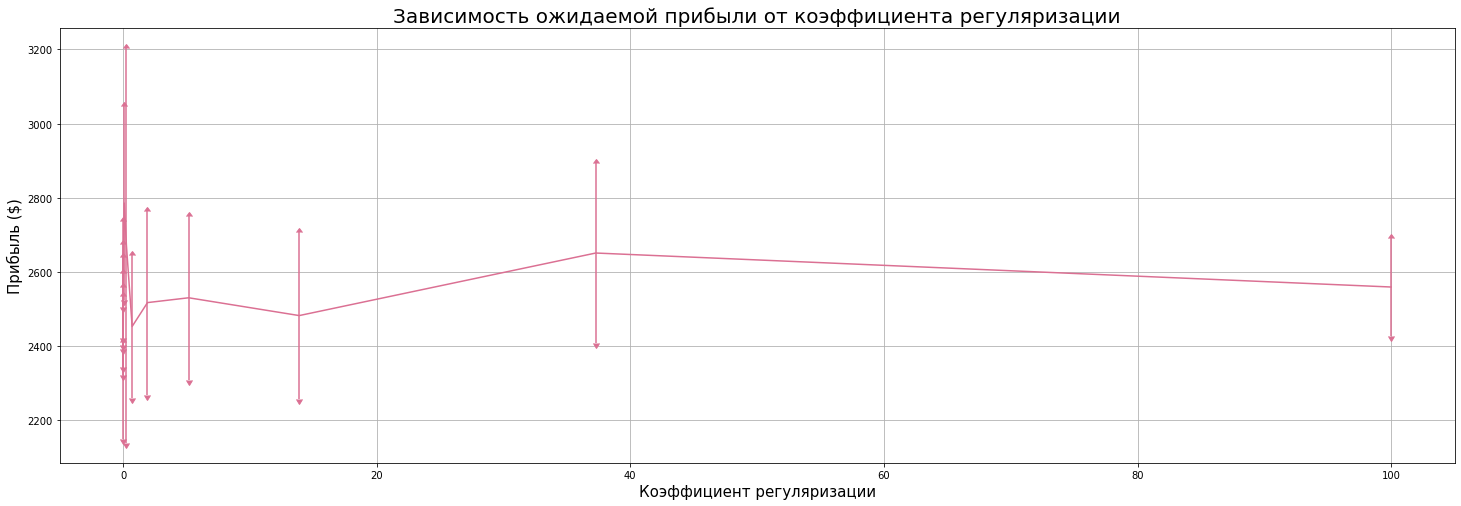

In [ ]:
plt.figure(figsize=(25,8))
plt.errorbar(reg, reg_pr, reg_d, uplims = True,  
             lolims = True, c='palevioletred')
plt.ylabel('Прибыль ($)', size=15)
plt.xlabel('Коэффициент регуляризации', size=15)
plt.title('Зависимость ожидаемой прибыли от коэффициента регуляризации', size=20)
plt.grid()
plt.show()

Да, да, выглядит уродски, но linspace выглядел как-то очень непоказательно... А logspace на графике тоже...

Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

С богом...

In [ ]:
reg = np.logspace(-4, 1, 10)
b_regs = []

for i in range(5):  
    best_reg = 1
    best_pr = 0
    for r in reg:
        model = LogisticRegression(penalty='l2', C=r, random_state=500)
        rev = []
        profit = []
        q_calls = []
        for train_index, test_index in cv.split(new_X):
            X_train, X_test = new_X.iloc[train_index, :], new_X.iloc[test_index, :]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            q_call = list(y_pred).count(1)
            q_calls.append(q_call)
            com_rev = y_test & y_pred
            com_rev = list(map(int, com_rev))
            cost = np.random.randint(0, 20, len(com_rev))
            com_rev *= cost
            rev.append(np.sum(com_rev))
            profit.append(np.sum(com_rev) - q_call)

        if (np.mean(profit) > best_pr):
            best_reg = r
            best_pr = np.mean(profit)
            
    b_regs.append(best_reg)

In [ ]:
print('Лучшие коэффициенты регуляризации на 5 запусках подбора по кросс-валидации:', b_regs)

Лучшие коэффициенты регуляризации на 5 запусках подбора по кросс-валидации: [0.016681005372000592, 0.016681005372000592, 2.782559402207126, 0.016681005372000592, 0.016681005372000592]


Ну что сказать... Один и тот же лучший коэффициент не находится, что вполне объяснимо использованием нами рандома. Закономерности тоже не наблюдается. 

Кажется, что так происходит из-за наличия рандомной составляющей в наших вычислениях. Поэтому все и скачет, и параметр регуляризации в том числе.

__Задание 13 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__ Кажется, что более важен recall.
Так как precision - это по сути доля объектов, названных классификатором положительными и при этом действительно являющимися положительными. То есть в нашем случае доля клиентов банка, которые были выбраны классификатором как те, что согласятся открыть депозит и они действительно согласятся. То есть банк точно получит от них выручку.
А recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. То есть долю людей, которые согласятся открыть депозит и которых выбрал наш алгоритм среди всех людей, которые согласились бы открыть депозит.

И в случае максимизации recall мы позвоним как можно большему количеству людей из тех, кто согласится открыть депозит. Таким образом максимизирую свою прибыль, так как мы можем допустить неточность алгоритма (и звонить людям, которые не согласятся) и тогда будем терять 1\$ с каждого неверного звонка. Но важнее охватить как можно больше положительного класса, так как выручка с каждого такого звонка составляет 10\$, то есть прибыль = 9\$. И тогда мы максимизируя recall плучим большую прибыль в целом.

Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [325]:
from sklearn.feature_selection import VarianceThreshold

In [416]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('ss', StandardScaler(), numeric)],
     remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ct', column_transformer),
    ('regression', LogisticRegression(penalty='l2', C=0.1, random_state=500))
])

In [419]:
thresholds = np.arange(0, 1, 0.01)
cv = KFold(n_splits=3, shuffle=True, random_state=500)
best_pr = 0
t_pr = []
st_d = []

for threshold in thresholds:
    rev = []
    profit = []
    q_calls = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        y_pred = pipeline.fit(X_train, y_train).predict_proba(X_test)[:, 1] > threshold    
        q_call = list(y_pred).count(1)
        q_calls.append(q_call)
        com_rev = y_test & y_pred
        com_rev = list(map(int, com_rev))
        cost = np.random.randint(0, 20, len(com_rev))
        com_rev *= cost
        rev.append(np.sum(com_rev))
        profit.append(np.sum(com_rev) - q_call)
    
    t_pr.append(np.mean(profit))
    st_d.append(np.std(profit))

    if (np.mean(profit) > best_pr):
        best_bin = threshold
        best_pr = np.mean(profit)

print('При пороге бинаризации =', best_bin, 'прибыль максимальна и равна', best_pr)

При пороге бинаризации = 0.15 прибыль максимальна и равна 6622.333333333333


Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

Я считаю, что 3 - это несколько, так что вот вам 3 разных графика. Кажется, порог получается именно в этой области потому что в ней значение прибыли примерно одинаково (судя по графикам), а вот дальше оно начинает практически линейно уменьшаться. Ну а меньше - совсем плохо. Это даже логически не очень. Так как - получается, что мы при очень маленькой вероятности успеха все равно звоним людям. А это приводит к лишним тратам -> прибыль меньше. Так как мы заведомо звоним намного большему числу людей, чем количество тех, кто в итоге согласился.

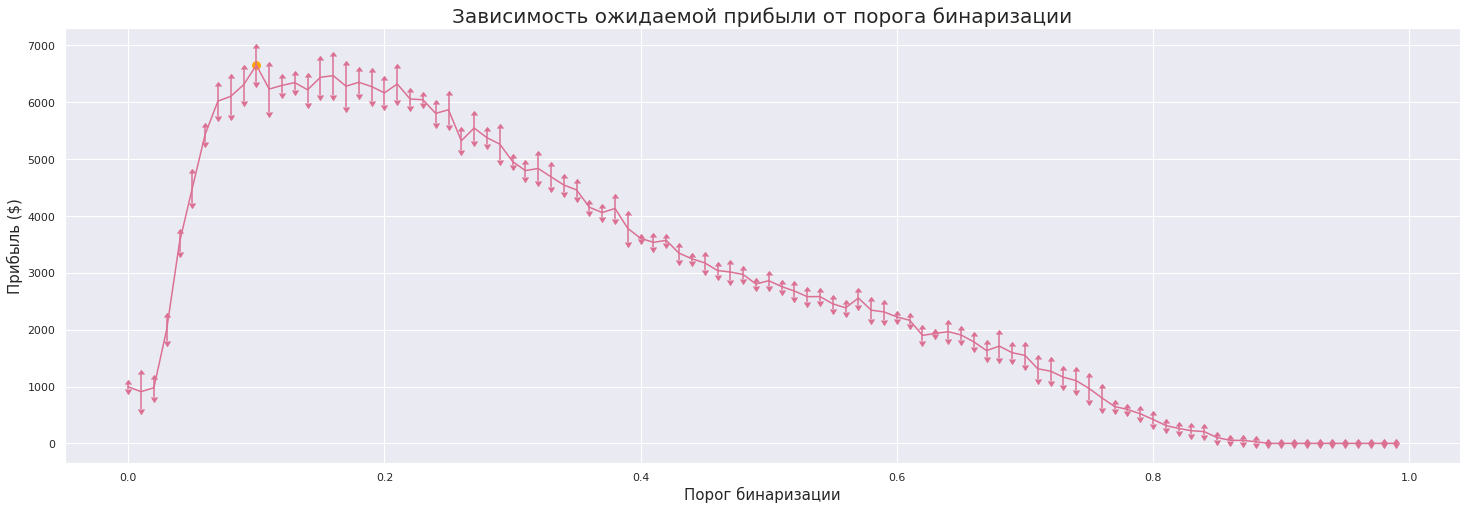

In [345]:
plt.figure(figsize=(25,8))
plt.scatter(best_bin, best_pr, c='orange', s=60, marker='o')
plt.errorbar(thresholds, t_pr, st_d, uplims = True,  
             lolims = True, c='palevioletred')
plt.grid()
plt.ylabel('Прибыль ($)', size=15)
plt.xlabel('Порог бинаризации', size=15)
plt.title('Зависимость ожидаемой прибыли от порога бинаризации', size=20)
plt.grid()
plt.show()

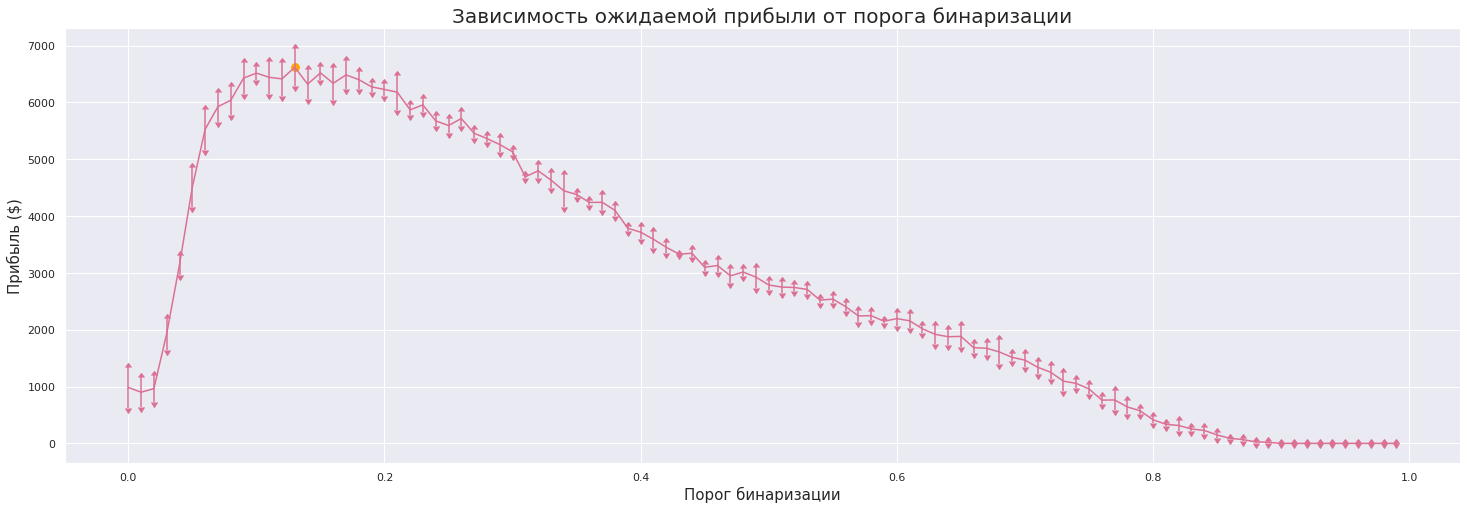

In [418]:
plt.figure(figsize=(25,8))
plt.scatter(best_bin, best_pr, c='orange', s=60, marker='o')
plt.errorbar(thresholds, t_pr, st_d, uplims = True,  
             lolims = True, c='palevioletred')
plt.grid()
plt.ylabel('Прибыль ($)', size=15)
plt.xlabel('Порог бинаризации', size=15)
plt.title('Зависимость ожидаемой прибыли от порога бинаризации', size=20)
plt.grid()
plt.show()

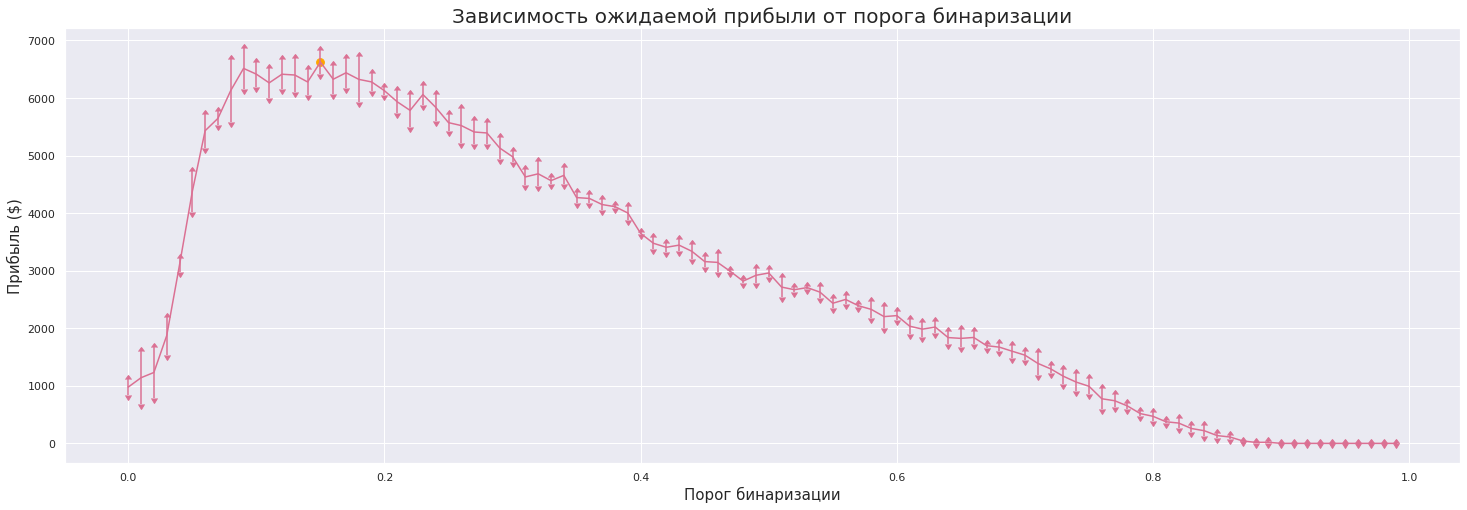

In [420]:
plt.figure(figsize=(25,8))
plt.scatter(best_bin, best_pr, c='orange', s=60, marker='o')
plt.errorbar(thresholds, t_pr, st_d, uplims = True,  
             lolims = True, c='palevioletred')
plt.grid()
plt.ylabel('Прибыль ($)', size=15)
plt.xlabel('Порог бинаризации', size=15)
plt.title('Зависимость ожидаемой прибыли от порога бинаризации', size=20)
plt.grid()
plt.show()

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [346]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [429]:
prs = []
recs = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = pipeline.fit(X_train, y_train).predict_proba(X_test)[:, 1] > best_bin  

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prs.append(precision)
    recs.append(recall)

print('Значение precision в среднем =', np.mean(prs))
print('Значение recall в среднем =', np.mean(recs))
print('Стандартное отклонение precision =', np.std(prs))
print('Стандартное отклонение recall =', np.std(recs))

Значение precision в среднем = 0.38789624738489065
Значение recall в среднем = 0.5989592752071853
Стандартное отклонение precision = 0.007286923384528024
Стандартное отклонение recall = 0.018424703291132535


Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [435]:

pr, re, thresholds = precision_recall_curve(y_test, y_pred)
a = auc(re[re >= 0.5], pr[re >=0.5]) / 0.5
a

0.2647312879505331

__Бонус (0.01 балла):__ что вы кушали в день сдачи данного ДЗ на завтрак?

__Ответ:__ 
А ничего я не кушала на завтрак с этим вашим МО... На завтрак я ботала((( А щас вот шоколадку "Milka" пористую с кокосом нервно ем, параллельно апатично нажимая по клавиатуре.

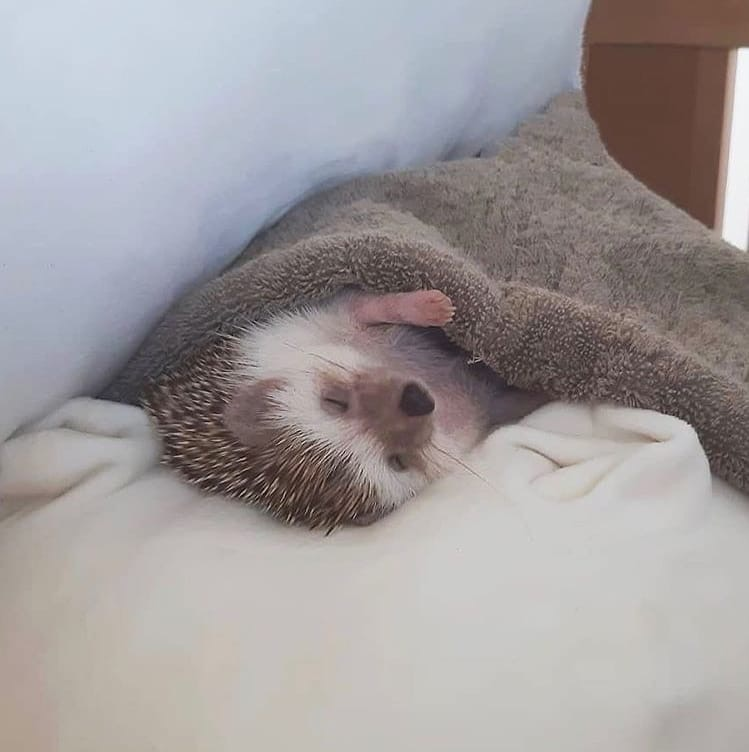